In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [5]:
df = sns.load_dataset("diamonds")

In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


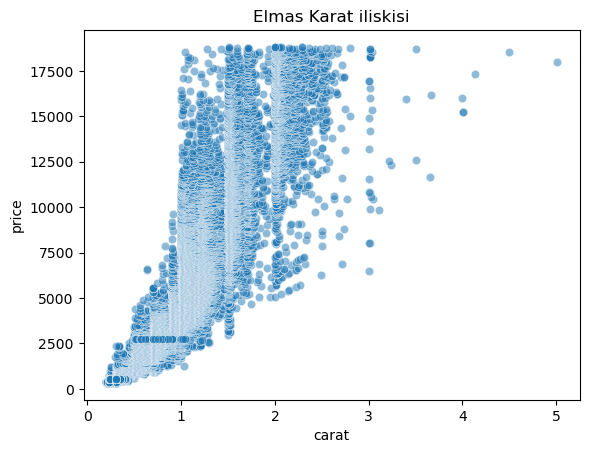

In [10]:
sns.scatterplot(x="carat",y="price",data=df,alpha=0.5)
plt.title("Elmas Karat iliskisi")
plt.xlabel("carat")
plt.ylabel("price")
plt.show()

In [11]:
X = df[["carat"]]
y = df[["price"]]

In [12]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [13]:
y_pred = model.predict(X)

In [14]:
mse = mean_squared_error(y,y_pred)

In [15]:
rmse=np.sqrt(mse)
r2 = r2_score(y,y_pred)

In [17]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R2 Squared Error: {r2:.2f}")

Mean Squared Error: 2397955.05
Root Mean Squared Error: 1548.53
R2 Squared Error: 0.85


In [19]:
new_diamond = [[1.5]] #1.5 caratlik elmas
tahmini_fiyat = model.predict(new_diamond)[0]
print(f"1.5 karat elmas icin tahmini fiyat : {tahmini_fiyat[0]:.2f} $")

1.5 karat elmas icin tahmini fiyat : 9378.28 $


/Users/gokturkberkekorkut/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Logistic Regression

### Diabete Prediction with Logistic Regression

In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

In [58]:
def outlier_threshold(df,col,q1=0.05,q3=0.95):
    q1_val = df[col].quantile(q1)
    q3_val = df[col].quantile(q3)
    iqr = q3_val - q1_val
    low_limit = q1_val - 1.5 *iqr
    upper_limit = q3_val + 1.5 * iqr
    return low_limit,upper_limit

In [59]:
def replace_with_thresholds(df,col):
    low, up = outlier_threshold(df,col)
    df[col] = np.where(df[col] < low , low , np.where(df[col] > up,up,df[col]))
    # bu kod eger df[col] low dan kucukse low degilse ikinci np.where uygula df[col] > ise up bu da degilse aykiri deger degil

In [60]:
def plot_confusion_matrix(y_true,y_pred):
    acc = round(accuracy_score(y_true,y_pred),2)
    cm = confusion_matrix(y_true,y_pred)
    sns.heatmap(cm,annot=True,fmt="d")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Accuracy: {acc}")
    plt.show()

In [61]:
df = pd.read_csv("diabetes.csv")

In [62]:
target = "Outcome"

In [63]:
features = [col for col in df.columns if col != target]

In [64]:
for col in features:
    replace_with_thresholds(df,col)

In [65]:
scaler = RobustScaler()

In [66]:
df[features] = scaler.fit_transform(df[features]) #verilerinizdeki sayısal özellikleri belirli bir aralığa (genellikle 0 ile 1 arasına veya ortalaması 0, standart sapması 1 olacak şekilde) dönüştürerek makine öğrenmesi modelinin daha iyi performans göstermesini sağlar.

In [67]:
X = df[features]
y = df[target]

In [68]:
log_model = LogisticRegression().fit(X,y)
y_pred = log_model.predict(X)
y_prob = log_model.predict_proba(X)[:,1] #log_model isimli lojistik regresyon modelini kullanarak X veri setindeki her bir gözlem için "1" sınıfına (genellikle pozitif veya hedeflenen durum) ait olma olasılığını hesaplar.

Training Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.74      0.58      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.74      0.75       768
weighted avg       0.78      0.78      0.78       768



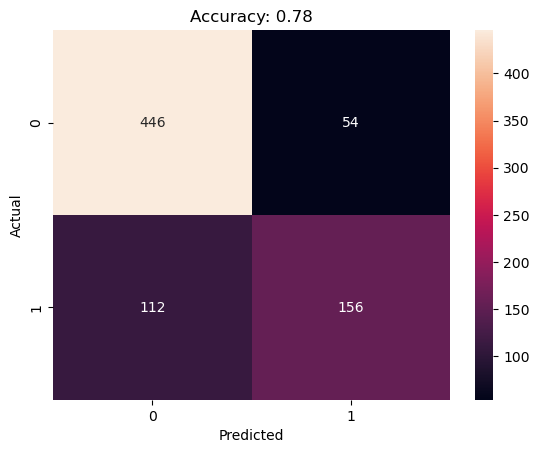

ROC AUC Score(Train): 0.8394104477611941


In [69]:
print("Training Classification Report:\n", classification_report(y,y_pred))
plot_confusion_matrix(y,y_pred)
print("ROC AUC Score(Train):",roc_auc_score(y,y_prob))

## CART (Classification and Regression Tree)

Random Forest'in temelini olusturur. Amaci veri seti icerisindeki karmasik yapilari basit karar yapilarina donusturmektir.

In [40]:
import sys
!{sys.executable} -m pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 1.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24555 sha256=8292cd9eb7677bead09f0ed8a84d3f9f1a8b78e33e63bd02f4487fa069506698
  Stored in directory: /Users/gokturkberkekorkut/Library/Caches/pip/wheels/bd/ce/e8/ff9d9c699514922f57caa22fbd55b0a32761114b4c4acc9e03
Successfully built pydotplus


In [43]:
import sys
!{sys.executable} -m pip install skompiler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 616.9 kB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for skompiler: filename=SKompiler-0.7-py3-none-any.whl size=54314 sha256=7aeb619b71483cbcee586b802a7db3801f1805071a4b182a705fc52ef87f7ec0
  Stored in directory: /Users/gokturkberkekorkut/Library/Caches/pip/wheels/14/72/77/016a3480b154c1c2f70dcb355af1a01ef832974079ec6148e6
Successfully built skompiler


In [44]:
import warnings
import joblib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grafik ve model görselleştirme için
import pydotplus
from graphviz import Source

# Scikit-learn model ve metrikleri
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text, plot_tree
from sklearn.metrics import classification_report, roc_auc_score

# Diğer kütüphaneler
from skompiler import skompile

# Genellikle kullanılmayan uyarıları kapatmak için
warnings.filterwarnings('ignore')

In [46]:
warnings.simplefilter(action='ignore',category = Warning)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',500)

In [70]:
df = pd.read_csv("diabetes.csv")

In [71]:
df.shape

(768, 9)

In [72]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [73]:
y = df["Outcome"]
X = df.drop("Outcome",axis=1)

In [75]:
model = DecisionTreeClassifier(random_state=1).fit(X,y)
y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:,1]

In [77]:
print("Confusion Matrix: \n", classification_report(y,y_pred))
print("ROC AUC:", roc_auc_score(y,y_pred))

Confusion Matrix: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768

ROC AUC: 1.0


In [79]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=17)

In [81]:
model = DecisionTreeClassifier(random_state=17).fit(X_train,y_train)

In [83]:
print("Eğitim Skoru (Train Score):\n", 
      classification_report(y_train, model.predict(X_train)))

Eğitim Skoru (Train Score):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       187

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



In [84]:
print("Test Skoru (Test Score):\n", 
      classification_report(y_test, model.predict(X_test)))

Test Skoru (Test Score):
               precision    recall  f1-score   support

           0       0.77      0.78      0.77       150
           1       0.58      0.57      0.57        81

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.70       231



#### Cross Validation

In [87]:
cv_model = DecisionTreeClassifier(random_state=17)
cv_results = cross_validate(cv_model,X,y,cv=5, scoring=["accuracy","f1","roc_auc"])
print("CV Accuracy" , cv_results['test_accuracy'].mean())
print("CV F1", cv_results['test_f1'].mean())
print("CV ROC AUC", cv_results['test_roc_auc'].mean())

CV Accuracy 0.7058568882098294
CV F1 0.5710621194523633
CV ROC AUC 0.6719440950384347


In [88]:
params = {"max_depth" : range(1,11),"min_samples_split": range(2,20)}
grid = GridSearchCV(cv_model,params,cv=5,n_jobs=-1,verbose=1).fit(X,y)

print("Best Params:",grid.best_params_)
print("Best CV Score",grid.best_score_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Params: {'max_depth': 5, 'min_samples_split': 12}
Best CV Score 0.7500806383159324


In [91]:
best_params = grid.best_params_
final_model = DecisionTreeClassifier(**best_params, random_state=17).fit(X_train, y_train)

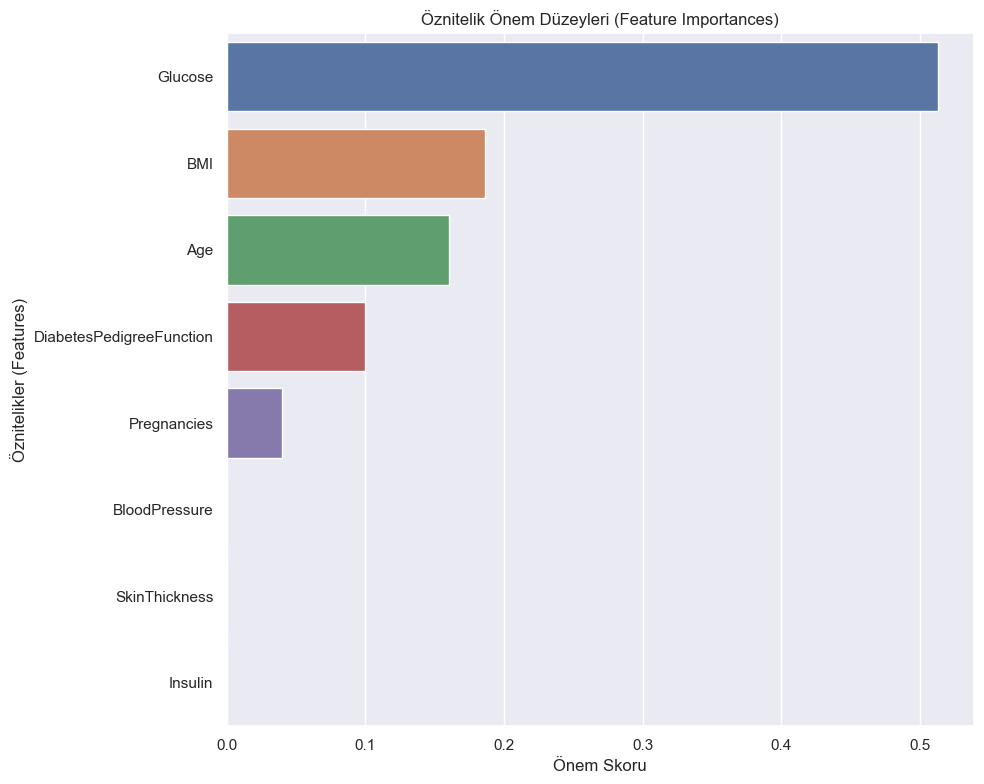

In [92]:
def plot_feature_importance(model, features, num=10):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title('Öznitelik Önem Düzeyleri (Feature Importances)')
    plt.ylabel('Öznitelikler (Features)')
    plt.xlabel('Önem Skoru')
    plt.tight_layout()
    plt.show()

plot_feature_importance(final_model, X)